# MNIST classification

MNIST is the hello world of machine learning. It is a dataset of 70,000 handwritten digits. http://yann.lecun.com/exdb/mnist/

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_mldata
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from scipy.ndimage.interpolation import shift

sns.set_style("white")

In [5]:
mnist = fetch_mldata('mnist-original')

In [6]:
X, y = mnist["data"], mnist["target"]

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

The images are 28 x 28 and are unrolled into vectors. 

example is a 0


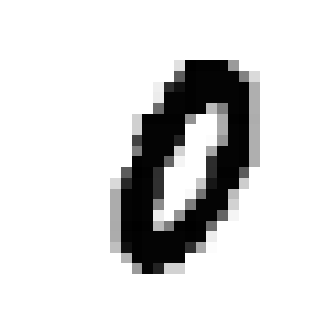

In [6]:
observation = 2

example = X[observation,:].reshape(28,28)
print("example is a {}".format(int(y[observation])))
plt.imshow(example)
plt.axis('off');

The data set is pre-split into training and test sets. The final 10,000 observations are the test set. 

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The observations are not pre-shuffled.

In [10]:
shuffle = np.random.permutation(60000)
X_train, y_train = X_train[shuffle], y_train[shuffle]

### K-nearest neighbors n=1

In [9]:
knn = KNeighborsClassifier(algorithm='brute',n_neighbors=1)
knn.fit(X_train, y_train)
predictions1 = knn.predict(X_test)
confusion_matrix(predictions1, y_test)

array([[ 973,    0,    7,    0,    0,    1,    4,    0,    6,    2],
       [   1, 1129,    6,    1,    7,    1,    2,   14,    1,    5],
       [   1,    3,  992,    2,    0,    0,    0,    6,    3,    1],
       [   0,    0,    5,  970,    0,   12,    0,    2,   14,    6],
       [   0,    1,    1,    1,  944,    2,    3,    4,    5,   10],
       [   1,    1,    0,   19,    0,  860,    5,    0,   13,    5],
       [   3,    1,    2,    0,    3,    5,  944,    0,    3,    1],
       [   1,    0,   16,    7,    5,    1,    0,  992,    4,   11],
       [   0,    0,    3,    7,    1,    6,    0,    0,  920,    1],
       [   0,    0,    0,    3,   22,    4,    0,   10,    5,  967]])

In [10]:
np.mean(predictions1 == y_test)

0.96909999999999996

96.9% accuracy

### K-nearest neighbors n=2

In [11]:
knn = KNeighborsClassifier(algorithm='brute',n_neighbors=2)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
confusion_matrix(predictions, y_test)

array([[ 976,    0,   11,    1,    3,    6,    7,    0,   10,    6],
       [   1, 1133,   10,    1,    7,    2,    3,   29,    2,    6],
       [   1,    2,  995,    8,    0,    0,    0,    8,    8,    3],
       [   0,    0,    1,  981,    0,   25,    0,    2,   28,    9],
       [   0,    0,    2,    1,  959,    2,    5,    3,    9,   19],
       [   1,    0,    0,    9,    0,  850,    4,    0,   29,    4],
       [   0,    0,    0,    0,    2,    2,  939,    0,    4,    1],
       [   1,    0,   12,    6,    3,    1,    0,  981,    5,   22],
       [   0,    0,    1,    2,    0,    1,    0,    0,  876,    2],
       [   0,    0,    0,    1,    8,    3,    0,    5,    3,  937]])

In [12]:
np.mean(predictions == y_test)

0.9627

Accuracy has decreased

### K-nearest neighbors n=5

In [13]:
knn = KNeighborsClassifier(algorithm='brute',n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
confusion_matrix(predictions, y_test)

array([[ 974,    0,   11,    0,    3,    5,    5,    0,    8,    5],
       [   1, 1133,    8,    3,    7,    0,    3,   22,    3,    7],
       [   1,    2,  991,    3,    0,    0,    0,    4,    5,    3],
       [   0,    0,    2,  976,    0,   12,    0,    0,   13,    9],
       [   0,    0,    1,    1,  944,    2,    3,    3,    6,    7],
       [   1,    0,    0,   13,    0,  862,    2,    0,   12,    3],
       [   2,    0,    1,    1,    4,    4,  945,    0,    5,    1],
       [   1,    0,   15,    6,    2,    1,    0,  988,    5,   10],
       [   0,    0,    3,    3,    1,    2,    0,    0,  913,    2],
       [   0,    0,    0,    4,   21,    4,    0,   11,    4,  962]])

In [14]:
np.mean(predictions == y_test)

0.96879999999999999

n=1 is still better.

### Add weights

In [15]:
knn = KNeighborsClassifier(algorithm='brute',n_neighbors=5, weights="distance") #1/distance
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
confusion_matrix(predictions, y_test)

array([[ 974,    0,   11,    0,    2,    4,    5,    0,    7,    3],
       [   1, 1133,    7,    2,    7,    0,    3,   20,    3,    5],
       [   1,    2,  989,    3,    0,    0,    0,    4,    5,    3],
       [   0,    0,    2,  973,    0,    9,    0,    0,   12,    7],
       [   0,    0,    0,    1,  943,    2,    3,    3,    5,    7],
       [   1,    0,    0,   13,    0,  861,    2,    0,   11,    3],
       [   2,    0,    2,    1,    4,    6,  945,    0,    5,    1],
       [   1,    0,   17,    7,    3,    1,    0,  990,    5,   11],
       [   0,    0,    4,    4,    0,    4,    0,    0,  916,    2],
       [   0,    0,    0,    6,   23,    5,    0,   11,    5,  967]])

In [16]:
np.mean(predictions == y_test)

0.96909999999999996

Same accuracy as n=1; however, not the exact same predictions:

In [17]:
confusion_matrix(predictions1, y_test) - confusion_matrix(predictions, y_test)

array([[-1,  0, -4,  0, -2, -3, -1,  0, -1, -1],
       [ 0, -4, -1, -1,  0,  1, -1, -6, -2,  0],
       [ 0,  1,  3, -1,  0,  0,  0,  2, -2, -2],
       [ 0,  0,  3, -3,  0,  3,  0,  2,  2, -1],
       [ 0,  1,  1,  0,  1,  0,  0,  1,  0,  3],
       [ 0,  1,  0,  6,  0, -1,  3,  0,  2,  2],
       [ 1,  1,  0, -1, -1, -1, -1,  0, -2,  0],
       [ 0,  0, -1,  0,  2,  0,  0,  2, -1,  0],
       [ 0,  0, -1,  3,  1,  2,  0,  0,  4, -1],
       [ 0,  0,  0, -3, -1, -1,  0, -1,  0,  0]])

### K-nearest neighbors n=10 with weights

In [18]:
knn = KNeighborsClassifier(algorithm='brute',n_neighbors=10, weights="distance") #1/distance
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
confusion_matrix(predictions, y_test)

array([[ 972,    0,   13,    0,    1,    4,    6,    0,    6,    5],
       [   1, 1132,   10,    3,   11,    0,    4,   25,    4,    6],
       [   1,    2,  983,    1,    0,    0,    0,    3,    4,    3],
       [   0,    0,    2,  975,    0,    4,    0,    0,   10,    5],
       [   0,    0,    1,    1,  940,    2,    3,    1,    6,    8],
       [   2,    0,    0,   12,    0,  868,    2,    0,    8,    4],
       [   3,    1,    2,    1,    4,    6,  943,    0,    3,    1],
       [   1,    0,   17,    7,    1,    1,    0,  987,    6,   10],
       [   0,    0,    4,    5,    1,    1,    0,    0,  919,    2],
       [   0,    0,    0,    5,   24,    6,    0,   12,    8,  965]])

In [19]:
np.mean(predictions == y_test)

0.96840000000000004

1 Neighbour performs surprisingly well. Some numbers seem more difficult to classify than others.

In [20]:
conf = confusion_matrix(predictions1, y_test)

In [21]:
conf

array([[ 973,    0,    7,    0,    0,    1,    4,    0,    6,    2],
       [   1, 1129,    6,    1,    7,    1,    2,   14,    1,    5],
       [   1,    3,  992,    2,    0,    0,    0,    6,    3,    1],
       [   0,    0,    5,  970,    0,   12,    0,    2,   14,    6],
       [   0,    1,    1,    1,  944,    2,    3,    4,    5,   10],
       [   1,    1,    0,   19,    0,  860,    5,    0,   13,    5],
       [   3,    1,    2,    0,    3,    5,  944,    0,    3,    1],
       [   1,    0,   16,    7,    5,    1,    0,  992,    4,   11],
       [   0,    0,    3,    7,    1,    6,    0,    0,  920,    1],
       [   0,    0,    0,    3,   22,    4,    0,   10,    5,  967]])

In [22]:
error_rate = 100 * (conf.sum(axis=1) - np.diag(conf)) / conf.sum(axis=1)

df = pd.DataFrame({'Error rate': error_rate})
df.index.name = 'Digit'
df

,Error rate
Digit,
0,2.014099
1,3.256213
2,1.587302
3,3.865213
4,2.780639
5,4.867257
6,1.871102
7,4.339441
8,1.918977


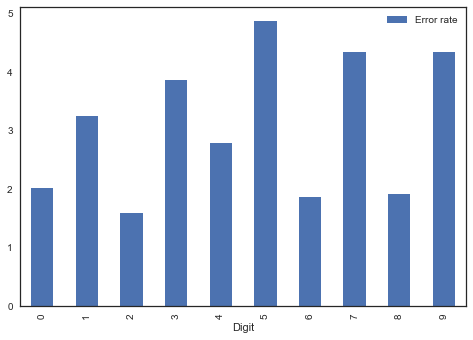

In [23]:
df.plot(kind='bar');

5 has the highest error rate

In [24]:
index = (predictions1 != 5) & (y_test == 5)
wrong_fives = X_test[index, : ]

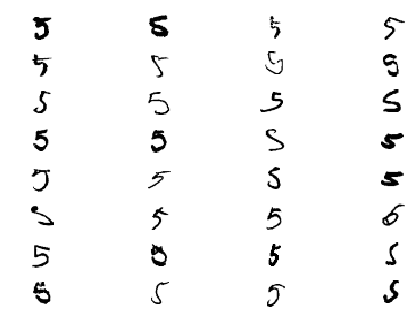

In [25]:
f, ax = plt.subplots(8, 4)

counter = 0

for column in range(4):
    for row in range(8):
        ax[row,column].imshow(wrong_fives[counter].reshape(28,28))
        counter +=1
        ax[row,column].axis('off');

Some of those fives look suspect.

(-0.5, 27.5, 27.5, -0.5)

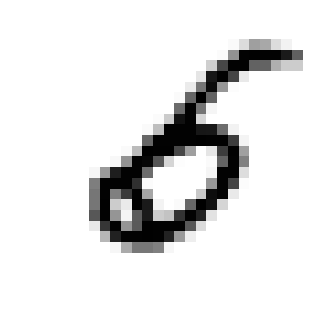

In [26]:
plt.imshow(wrong_fives[29].reshape(28,28))
plt.axis('off')

Sure looks like a 6 to me!

Augmentation can be used to improve performance. Gollan et al achieved 99.48% accuracy using a pseudo-two-dimensional hidden Markov distortion model (P2DHMM) in their preprocessing stage. http://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=E0F3BDC7642FBA1D8E2811526BD0E596?doi=10.1.1.106.3963&rep=rep1&type=pdf

Lets add augmented images to the training set, new images shifted one pixel for each direction.

In [11]:
def image_shift(image, direction, magnitude):
    
    shift_dict = {'up': [-magnitude, 0], 'down': [magnitude, 0],'left': [0, -magnitude],'right': [0, magnitude]}
    
    shift_coords = shift_dict[direction]
        
    image = image.reshape((28,28))
        
    image_shifted = shift(image, shift_coords, mode='constant')
    
    return image_shifted.reshape([-1])

For demonstration, the same image shifted by five pixels in each direction.

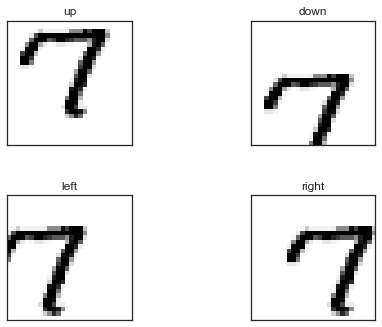

In [28]:
f, ax = plt.subplots(2, 2)
f.subplots_adjust(hspace = 0.4)

shiftlist = ['up', 'left', 'down', 'right']
magnitude = 5

counter = 0

for column in range(2):
    for row in range(2):
        ax[row,column].imshow(image_shift(X_train[1], shiftlist[counter], magnitude).reshape(28,28))
        ax[row,column].set_title(shiftlist[counter])
        ax[row,column].set_xticks([])
        ax[row,column].set_yticks([])
        counter +=1

In [12]:
shiftlist = ['up', 'left', 'down', 'right']
magnitude = 1

X_train_augmented = [image for image in X_train]

for direction in shiftlist:
    for image in X_train:
        X_train_augmented.append(image_shift(image, direction, magnitude))

X_train_augmented = np.array(X_train_augmented)

y_train_augmented = np.tile(y_train, 5)

In [13]:
X_train_augmented.shape

(300000, 784)

In [14]:
y_train_augmented.shape

(300000,)

### Augmented K-nearest neighbors n=1

In [32]:
knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train_augmented, y_train_augmented)
predictions = knn.predict(X_test)
confusion_matrix(predictions, y_test)

array([[ 974,    0,    6,    1,    0,    1,    4,    0,    4,    2],
       [   1, 1130,    3,    2,    2,    2,    4,   18,    2,    3],
       [   1,    3,  998,    2,    0,    0,    0,    5,    2,    1],
       [   0,    0,    2,  983,    0,   10,    0,    0,   12,    5],
       [   0,    1,    2,    1,  946,    0,    0,    5,    5,    8],
       [   1,    0,    0,    9,    0,  865,    3,    0,   13,    6],
       [   2,    1,    2,    0,    4,    6,  947,    0,    4,    0],
       [   1,    0,   17,    5,    4,    1,    0,  990,    4,   10],
       [   0,    0,    1,    5,    0,    4,    0,    0,  921,    1],
       [   0,    0,    1,    2,   26,    3,    0,   10,    7,  973]])

In [33]:
np.mean(predictions == y_test)

0.97270000000000001

0.3% accuracy boost

In [34]:
index_augment = ((predictions != 5) & (y_test == 5))
wrong_fives_augment = X_test[index_augment, : ]

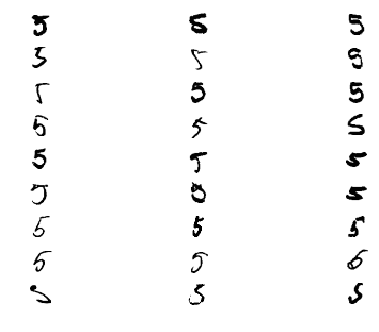

In [35]:
f, ax = plt.subplots(9, 3)

counter = 0

for column in range(3):
    for row in range(9):
        ax[row,column].imshow(wrong_fives_augment[counter].reshape(28,28))
        counter +=1
        ax[row,column].axis('off');

The most suspect fives remain

### Using TensorFlow's high level API to create a neural net

In [15]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

C:\Users\James\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
X_train_augmented = np.array(X_train_augmented, dtype=np.float32)
y_train_augmented = np.array(y_train_augmented, dtype=np.int32)

scaler = StandardScaler()
X_train_augmented_scale = scaler.fit_transform(X_train_augmented)

In [19]:
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
neural_net = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10, feature_columns = feature_cols)
neural_net = tf.contrib.learn.SKCompat(neural_net) #sklearn compatible
neural_net.fit(X_train_augmented_scale, y_train_augmented, monitors=None,max_steps=10000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_model_dir': 'C:\\Users\\James\\AppData\\Local\\Temp\\tmpac5dskz_', '_master': '', '_environment': 'local', '_tf_random_seed': None, '_save_checkpoints_secs': 600, '_task_type': None, '_num_ps_replicas': 0, '_evaluation_master': '', '_keep_checkpoint_max': 5, '_is_chief': True, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_session_config': None, '_num_worker_replicas': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FEED1E6CC0>, '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\James\AppData\Local\Temp\tmpac5dskz_\model.ckpt.
INFO:tensorflow:step = 1, loss = 2.6019049
INFO:tensorflow:global_step/sec: 151.345
INFO:tensorflow:step = 101, loss = 0.40735814 (0.663

SKCompat()

In [24]:
nn_pred = neural_net.predict(X_train_augmented_scale)

INFO:tensorflow:Restoring parameters from C:\Users\James\AppData\Local\Temp\tmpac5dskz_\model.ckpt-10000


In [27]:
np.mean(nn_pred['classes'] == y_train_augmented)

0.9960633333333333

99.6% training accuracy

In [28]:
nn_pred = neural_net.predict(X_test)

INFO:tensorflow:Restoring parameters from C:\Users\James\AppData\Local\Temp\tmpac5dskz_\model.ckpt-10000


In [31]:
np.mean(nn_pred['classes'] == y_test)

0.9505

95.05% accuracy on the test set, after only 10000 iterations.